In [5]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
df = pd.read_csv("covid19.csv")

In [9]:
df = df.loc[:,['data','casos']]
FMT = '%Y-%m-%d %H:%M:%S'
date = df['data']
df['data'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-03-01 00:00:00", FMT)).days  )

In [10]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [11]:
x = list(df.iloc[:,0])
y = list(df.iloc[:,1])
fit = curve_fit(logistic_model,x,y,p0=[2,20,2000])

In [12]:
fit


(array([4.20336020e+00, 2.97391958e+01, 1.44598982e+04]),
 array([[3.42026244e-03, 6.01009953e-03, 8.12851352e+00],
        [6.01009953e-03, 1.46533849e-02, 1.89374878e+01],
        [8.12851352e+00, 1.89374878e+01, 2.61090568e+04]]))

In [13]:
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]

In [14]:
errors

[0.05848300986916398, 0.12105116657426818, 161.58297200791336]

In [15]:
a = fit[0][0]
b = fit[0][1]
c = fit[0][2]

In [16]:
sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))

In [17]:
y_pred_logistic = [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x]

mean_squared_error(y,y_pred_logistic)


6532.063369598847

In [18]:
#def exponential_model(x,a,b,c):
    #return a*np.exp(b*(x-c))
#exp_fit = curve_fit(exponential_model,x,y,p0=[2,20,2000])

In [19]:
#exp_fit


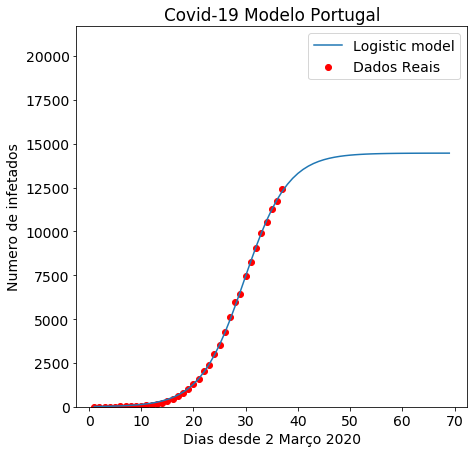

In [20]:
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Dados Reais",color="red")
# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label="Logistic model" )
plt.legend()
plt.xlabel("Dias desde 2 Março 2020")
plt.ylabel("Numero de infetados")
plt.ylim(0, c*1.5)
plt.title("Covid-19 Modelo Portugal")
plt.show()

In [21]:
from datetime import timedelta, date
final = datetime.strptime("2020-03-02 00:00:00", FMT) + timedelta(days=sol)
final.strftime('End of pandemic predicted at: %d, %b %Y')

'End of pandemic predicted at: 11, May 2020'